## MST approximation to TSP

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

## TSP via MST ~ factor 2 algorithm

In [9]:
def drop_repeated(input_list):
    """
    return a list omitting the repeated elements of input_list while maintaining the order of 
    elements in the list.
    """
    output_list = []
    for entry in input_list:
        if entry in output_list:
            pass
        else:
            output_list.append(entry)
    return output_list

def metric_mst_tsp(G,s):
    """
    return a list of vertices of G representing an approximate Traveling Salesman Problem cycle
    starting and ending at s.
    G -- a fully connected undirected weighted graph where edge weights satisfy triangle inequality.
    s -- a vertex in G
    """
    T = nx.minimum_spanning_tree(G)
    dfs_edges = list(nx.dfs_edges(T,source=s))
    vertices = []
    for e in dfs_edges:
        vertices.append(e[0])
        vertices.append(e[1])
    tsp_path = drop_repeated(vertices)
    tsp_path.append(s)
    
    return tsp_path

## TSP via Christofides ~ factor 1.5 algorithm

In [45]:
def find_max_weight(G):
    """
    return the weight of the heaviest edge in G
    """
    max_weight = 0
    for edge in G.edges:
        u,v = edge[0],edge[1]
        if G[u][v]['weight'] > max_weight:
            max_weight = G[u][v]['weight']
    return max_weight

def transform_graph_for_max_matching(G):
    """
    returns a graph with modified edge weights such that a maximal matching on the 
    modified graph corresponds to a minimal matching on G
    """
    max_weight = find_max_weight(G)
    modified_graph = nx.Graph()
    for edge in G.edges:
        u,v = edge[0],edge[1]
        wt = G[u][v]['weight']
        modified_graph.add_edge(u,v,weight=max_weight-wt)
    return modified_graph

def min_weight_matching(G):
    """
    Returns a set of edges representing a minimum weight matching.
    Every node appears only once in a matching.
    """
    modified_graph = transform_graph_for_max_matching(G)
    min_matching = nx.max_weight_matching(modified_graph)
    return min_matching

def find_odd_degree_nodes(G):
    """
    returns a list of vertices which have odd degree in graph G.
    """
    degree = G.degree()
    odd_nodes = []
    for v in G.nodes:
        if degree[v] % 2 == 0:
            pass
        else:
            odd_nodes.append(v)
    return odd_nodes

def construct_fully_connected_subgraph(node_subset,G):
    """
    return a graph with `node_subset` as the nodes. The graph is fully connected and uses the same edge
    weight as in G.
    """
    sub_graph = nx.Graph()
    for u in node_subset:
        for v in node_subset:
            if u == v:
                pass
            else:
                wt = G[u][v]['weight']
                sub_graph.add_edge(u,v,weight=wt)
    return sub_graph

In [46]:
G = nx.Graph()
G.add_edge(1,2,weight=2)
G.add_edge(2,4,weight=1)
G.add_edge(3,4,weight=2)
G.add_edge(1,3,weight=1)

In [47]:
T = nx.minimum_spanning_tree(G)
M = min_weight_matching(G)
euler_graph = nx.MultiGraph()
for edge in T.edges:
    u,v = edge[0],edge[1]
    wt = T[u][v]['weight']
    euler_graph.add_edge(u,v,weight=wt)
for edge in M:
    u,v = edge[0],edge[1]
    wt = G[u][v]['weight']
    euler_graph.add_edge(u,v,wt)

/home/arjun/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


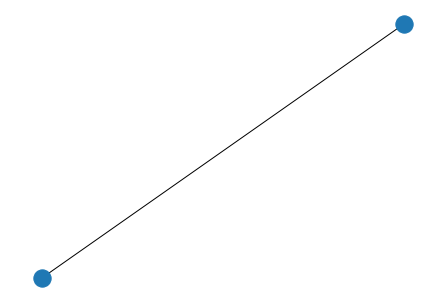

In [49]:
odd_nodes = find_odd_degree_nodes(T)
odd_nodes
sub_graph = construct_fully_connected_subgraph(odd_nodes,G)

In [51]:
M = min_weight_matching(sub_graph)

{(3, 4)}